# 项目：沃尔玛销售数据_相关分析、线性回归模型建立与评估

## 1. 简介

### 分析目标

本实战项目的目的是，练习评估数据的结构性问题和内容性问题，并且基于评估结果对沃尔玛的销售数据进行清洗、整理，从而得到干净、整洁的数据，供下一步用于探索不同地区沃尔玛零售店销售额的影响因素，通过进一步创建预测模型，可以预测未来X个月/年的销售情况，并针对零售门店库存管理方面的问题提出建议，以使得供应与需求更加匹配。

#### 数据每列的含义如下：


- `Store`：店铺编号
- `Date`：销售周
- `Weekly_Sales`：店铺在该周的销售额
- `Holiday_Flag`：是否为假日周
- `Temperature`：销售日的温度
- `Fuel_Price`：该地区的燃油成本
- `CPI（消费者物价指数）`：消费者物价指数
- `Unemployment`：失业率

## 2. 载入库和数据集

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from IPython.display import Image
from sklearn import model_selection

%matplotlib inline

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #  用来正常显示负号
plt.rcParams['figure.figsize'] = (10,6) #  设置输出图片大小

In [3]:
# 读取数据集
cleaned_data = pd.read_csv('cleaned_data.csv', index_col=['Unnamed: 0'])
cleaned_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,TemperatureBand,CPIBand,UnemploymentBand,Fuel_PriceBand,WeeklySalesBand
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,1,1,3,3,1,9
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1,1,3,3,1,9
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1,1,3,3,1,9
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1,1,3,3,1,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1,1,3,3,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,3,3,3,4,4,4
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,4,3,3,4,4,4
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,4,2,3,4,4,4
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4,2,3,4,4,4


## 3. 相关分析

### 3.1 全部变量的相关性矩阵

#### 3.1.1 corr()函数方法

In [4]:
# 删除部分列
df1 = cleaned_data.iloc[:, [0,2,3,4,5,6,7,8]]
df1

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,1
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,1
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,1
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,1
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,1
...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,3
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,4
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,4
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,4


In [5]:
# corr()默认是Pearson相关，也可以将method设置为kendall, Spearman
corr_df = df1.corr()
corr_df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,5.034745e-16
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,6.336275e-02
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,8.136344e-02
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,2.444967e-01
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,-4.307778e-02
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,4.733426e-03
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-1.787284e-02
Quarter,5.034745e-16,0.063363,8.136344e-02,0.244497,-0.043078,0.004733,-0.017873,1.000000e+00


#### 3.1.2 sns.heatmap() 热力图方法

<AxesSubplot:>

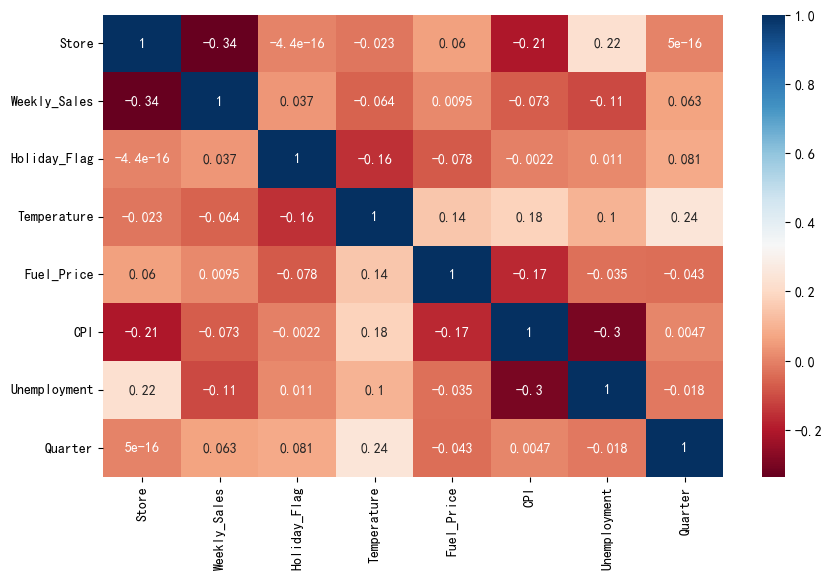

In [6]:
sns.heatmap(df1.corr(), annot=True, cmap='RdBu', xticklabels=1, yticklabels=1)

#### 3.1.3 正负系数分离 - 横向条形图

<AxesSubplot:>

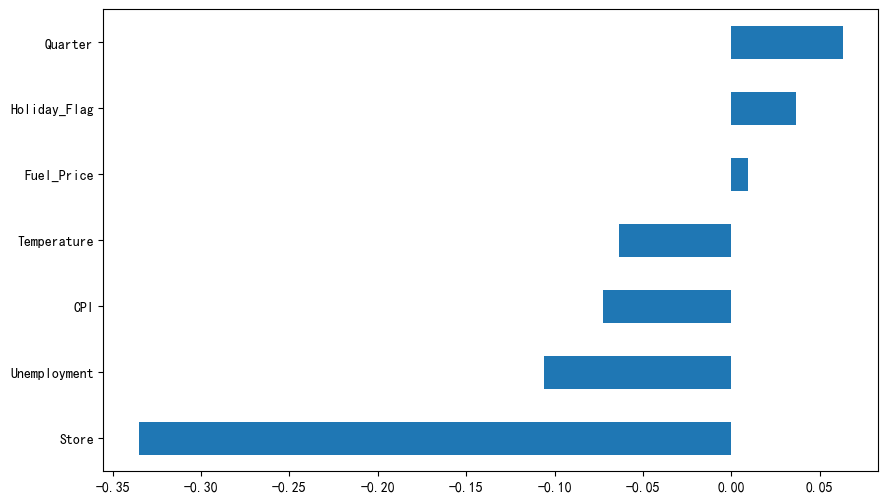

In [7]:
# 从相关系数矩阵提取一列
df1.corr().Weekly_Sales

# 从序列中删除第一个数据
df1.corr()['Weekly_Sales'].drop('Weekly_Sales')

# 对序列的取值进行排序
df1.corr()['Weekly_Sales'].drop('Weekly_Sales').sort_values().plot(kind='barh')

从以上结果可以看出，门店ID、失业率、CPI、温度均与销售额呈负相关，而季度、是否假日周则成正相关。  
  
接下来，需要加上相关的显著性指标再进行查看。

### 3.2 相关显著性判断

#### 3.2.1 两个变量的相关显著性

In [8]:
import scipy.stats as stats
from scipy.stats import pearsonr

In [9]:
r,p_value = stats.pearsonr(df1['Weekly_Sales'],df1['Store'])
print('相关系数为{:.3f},p值为{:.5f}'.format(r,p_value))

相关系数为-0.335,p值为0.00000


p<0.001，表明门店ID与销售额存在显著的线性负相关，相关系数为-0.335。

#### 3.2.2 所有变量的相关显著性，含显著性标记的热力图

In [10]:
def cm2inch(x,y):
    return x/2.54, y/2.54
size1 = 10.5
mpl.rcParams.update(
{
'text.usetex': False,
'font.family': 'stixgeneral',
'mathtext.fontset': 'stix',
"font.family":'serif',
"font.size": size1,
"font.serif": ['Times New Roman'],
}
)
fontdict = {'weight': 'bold','size':size1,'family':'SimHei'}

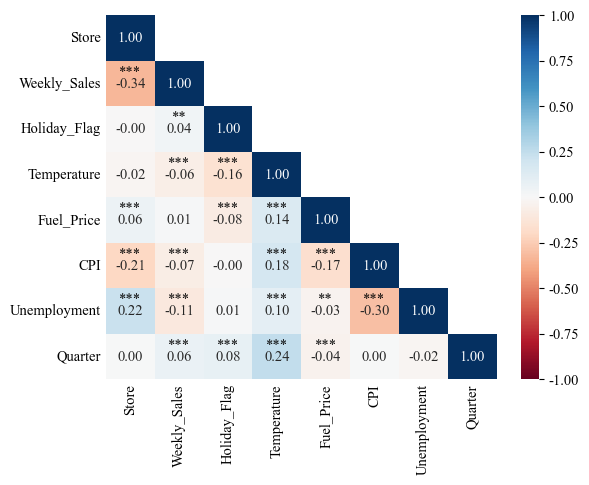

In [11]:
fig = plt.figure(figsize=(cm2inch(16,12)))
ax1 = plt.gca()

#构造mask，去除重复数据显示
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
mask2 = mask
mask = (np.flipud(mask)-1)*(-1)
mask = np.rot90(mask,k = -1)

im1 = sns.heatmap(corr_df,annot=True,cmap="RdBu"
, mask=mask#构造mask，去除重复数据显示
,vmax=1,vmin=-1
, fmt='.2f',ax = ax1)

ax1.tick_params(axis = 'both', length=0)

#计算相关性显著性并显示
rlist = []
plist = []
for i in df1.columns.values:
    for j in df1.columns.values:
        r,p = pearsonr(df1[i],df1[j])
        rlist.append(r)
        plist.append(p)

rarr = np.asarray(rlist).reshape(len(df1.columns.values),len(df1.columns.values))
parr = np.asarray(plist).reshape(len(df1.columns.values),len(df1.columns.values))
xlist = ax1.get_xticks()
ylist = ax1.get_yticks()

widthx = 0
widthy = -0.15

for m in ax1.get_xticks():
    for n in ax1.get_yticks():
        pv = (parr[int(m),int(n)])
        rv = (rarr[int(m),int(n)])
        if mask2[int(m),int(n)]<1.:
            if abs(rv) > 0.5:
                if  pv< 0.05 and pv>= 0.01:
                    ax1.text(n+widthx,m+widthy,'*',ha = 'center',color = 'white')
                if  pv< 0.01 and pv>= 0.001:
                    ax1.text(n+widthx,m+widthy,'**',ha = 'center',color = 'white')
                if  pv< 0.001:
                    print([int(m),int(n)])
                    ax1.text(n+widthx,m+widthy,'***',ha = 'center',color = 'white')
            else: 
                if  pv< 0.05 and pv>= 0.01:
                    ax1.text(n+widthx,m+widthy,'*',ha = 'center',color = 'k')
                elif  pv< 0.01 and pv>= 0.001:
                    ax1.text(n+widthx,m+widthy,'**',ha = 'center',color = 'k')
                elif  pv< 0.001:
                    ax1.text(n+widthx,m+widthy,'***',ha = 'center',color = 'k')

plt.show()

以上结果表明，销售额与门店ID、是否假日周、温度、CPI物价指数、季度均存在显著线性相关，但是与燃油价不存在显著相关。

## 4. 多元线性回归模型构建与评估

- 多元线性回归尝试通过一个线性方程来适配观测数据，这个线性方程是在两个及两个以上的特征和响应之间构建的一个关系。  
- 多元线性回归的实现步骤和一元线性回归类似，在评价部分有所不同。  
- 虚拟变量：用来表示非数值数据类型的分类值。比如性别。  
- 多重共线性：多重共线性源自线性模型，它是指由于自变量之间存在高度相关关系而使模型参数估计不准确。这个由虚拟变量引起的多重共线性问题在学术上被称为虚拟变量陷阱(dummy variable trap)。  
- 虚拟变量陷阱：两个及两个以上变量之间高度相关的情形，也就是说存在一个能够被其他变量预测出的变量。

### 4.1 选择除分类变量外的变量构建回归模型

相关分析结果表明燃油价格与销售额不存在显著相关，因此，不纳入回归模型。

In [12]:
# 小写ols才会自带截距项，大写的不会
from statsmodels.formula.api import ols

In [13]:
# 固定格式：因变量~自变量（+号连接）
lm = ols('Weekly_Sales ~ Store + Holiday_Flag + Temperature + CPI + Unemployment', data=df1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     211.9
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          7.51e-210
Time:                        15:34:18   Log-Likelihood:                -93861.
No. Observations:                6435   AIC:                         1.877e+05
Df Residuals:                    6429   BIC:                         1.878e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.032e+06   5.07e+04     40.114      0.000    1.93e+06    2.13e+06
Store        -1.537e+04    521.337    -29.488      0.000   -1.64e+04   -1.44e+04
Holiday_Flag  7.222e+04   2.59e+04      2.787      0.005    2.14e+04    1.23e+05
Temperature   -929.0252    369.081     -2.517      0.012   -1652.547    -205.503
CPI          -2345.9264    180.191    -13.019      0.000   -2699.160   -1992.693
Unemployment  -2.22e+04   3755.948     -5.910      0.000   -2.96e+04   -1.48e+04
==============================================================================
Omnibus:                      188.685   Durbin-Watson:                   0.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.924
Skew:                           0.434   Prob(JB):                     3.17e-45
Kurtosis:                       3.100   Cond. No.                     1.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

从以上输出结果可以看出，R方为0.141，模型的精度较低。  
接下来将分类变量转换为虚拟变量，再纳入模型。

### 4.2 加入Quarter虚拟变量

In [14]:
norminal_vars= ['Store', 'Quarter']

for each in norminal_vars:
    print(each, ":")
    print(df1[each].agg(['value_counts']).T)
    # 直接 .value_counts().T 无法实现下面的效果
    print('='*35)

Store :
Store          1    24   26   27   28   29   30   31   32   33  ...   13   14  \
value_counts  143  143  143  143  143  143  143  143  143  143  ...  143  143   

Store          15   16   17   18   19   20   21   45  
value_counts  143  143  143  143  143  143  143  143  

[1 rows x 45 columns]
Quarter :
Quarter          3     2     1     4
value_counts  1800  1755  1485  1395


In [15]:
# 为Quarter设置虚拟变量
nominal_data1 = df1['Quarter']

Quarter_dummy = pd.get_dummies(nominal_data1, drop_first=False, prefix='Quarter')
# pandas会自动命名虚拟变量

Quarter_dummy.sample()

,Quarter_1,Quarter_2,Quarter_3,Quarter_4
90,False,False,False,True


In [16]:
nominal_df = pd.concat(objs=[df1, Quarter_dummy], axis=1)
nominal_df.sample()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Quarter_1,Quarter_2,Quarter_3,Quarter_4
2044,15,1120018.92,1,40.71,3.186,132.836933,8.067,4,False,False,False,True


In [35]:
nominal_df.drop(['Weekly_Sales','Quarter'],axis=1).to_csv('LogisticR_data.csv')

将季度变量的虚拟变量纳入模型：

In [18]:
lm2 = ols('Weekly_Sales ~ Store + Holiday_Flag + Temperature + CPI + Unemployment + Quarter_1 + Quarter_2 + Quarter_3 + Quarter_4', data=nominal_df).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     138.9
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          4.69e-216
Time:                        15:34:18   Log-Likelihood:                -93839.
No. Observations:                6435   AIC:                         1.877e+05
Df Residuals:                    6426   BIC:                         1.878e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.637e+06   4.12e+04     39.728      0.000    1.56e+06    1.72e+06
Quarter_1[T.True]  3.413e+05   1.65e+04     20.715      0.000    3.09e+05    3.74e+05
Quarter_2[T.True]  4.144e+05   1.61e+04     25.803      0.000    3.83e+05    4.46e+05
Quarter_3[T.True]  4.075e+05   1.93e+04     21.071      0.000     3.7e+05    4.45e+05
Quarter_4[T.True]  4.738e+05   1.56e+04     30.356      0.000    4.43e+05    5.04e+05
Store             -1.539e+04    519.796    -29.614      0.000   -1.64e+04   -1.44e+04
Holiday_Flag       6.037e+04   2.62e+04      2.301      0.021    8934.978    1.12e+05
Temperature       -1433.2969    546.802     -2.621      0.009   -2505.211    -361.382
CPI               -2292.7873    184.636    -12.418      0.000   -2654.735   -1930.840
Unemployment      -2.104e+04   3831.774     -5.492      0.000   -2.86e+04   -1.35e+04
==============================================================================
Omnibus:                      157.271   Durbin-Watson:                   0.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.671
Skew:                           0.396   Prob(JB):                     2.36e-37
Kurtosis:                       2.962   Cond. No.                     7.45e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.08e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

模型的解释度在加入了Quarter虚拟变量后有所提升。  
可以看出，燃油价的解释力并不显著，因此将燃油价去掉再查看模型。

### 4.3 全部变量"forward"逐步回归

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
# 清洗面积段这个标签
le = LabelEncoder()
y6 = le.fit_transform(nominal_df['Weekly_Sales'])
nominal_df['Weekly_Sales']=y6

sales_data=nominal_df

#分训练集测试集
import random
random.seed(123) #设立随机数种子
a=random.sample(range(len(sales_data)),round(len(sales_data)*0.3))
sales_test=[]
for i in a:
    sales_test.append(sales_data.iloc[i])
sales_test=pd.DataFrame(sales_test)
sales_train=sales_data.drop(a)

print(sales_train)
print(sales_test)

      Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
1         1          5360             1        38.51       2.548  211.242170   
3         1          4784             0        46.63       2.561  211.319643   
4         1          5190             0        46.50       2.625  211.350143   
5         1          4887             0        57.79       2.667  211.380643   
7         1          4758             0        51.45       2.732  211.018042   
...     ...           ...           ...          ...         ...         ...   
6429     45          2330             0        65.32       4.038  191.856704   
6430     45          2284             0        64.88       3.997  192.013558   
6431     45          2360             0        64.89       3.985  192.170412   
6432     45          2365             0        54.47       4.000  192.327265   
6433     45          2307             0        56.47       3.969  192.330854   

      Unemployment  Quarter  Quarter_1 

删除燃油价后，模型的解释力并未发生改变，不过温度的相关性出现了边缘显著。  
接下来把门店也转换为虚拟变量纳入进去。

In [21]:
#定义向前逐步回归函数
def forward_select(data,target):
    variate=set(data.columns)  #将字段名转换成字典类型
    variate.remove(target)  #去掉因变量的字段名
    selected=[]
    current_score,best_new_score=float('inf'),float('inf')  #目前的分数和最好分数初始值都为无穷大（因为AIC越小越好）
    #循环筛选变量
    while variate:
        aic_with_variate=[]
        for candidate in variate:  #逐个遍历自变量
            formula="{}~{}".format(target,"+".join(selected+[candidate]))  #将自变量名连接起来
            aic=ols(formula=formula,data=data).fit().aic  #利用ols训练模型得出aic值
            aic_with_variate.append((aic,candidate))  #将第每一次的aic值放进空列表
        aic_with_variate.sort(reverse=True)  #降序排序aic值
        best_new_score,best_candidate=aic_with_variate.pop()  #最好的aic值等于删除列表的最后一个值，以及最好的自变量等于列表最后一个自变量
        if current_score>best_new_score:  #如果目前的aic值大于最好的aic值
            variate.remove(best_candidate)  #移除加进来的变量名，即第二次循环时，不考虑此自变量了
            selected.append(best_candidate)  #将此自变量作为加进模型中的自变量
            current_score=best_new_score  #最新的分数等于最好的分数
            print("aic is {},continuing!".format(current_score))  #输出最小的aic值
        else:
            print("for selection over!")
            break
    formula="{}~{}".format(target,"+".join(selected))  #最终的模型式子
    print("final formula is {}".format(formula))
    model=ols(formula=formula,data=data).fit()
    return(model)

# 利用向前逐步回归筛选变量
lm_0=forward_select(data=sales_data,target='Weekly_Sales')
print(lm_0.summary())

lm_1=ols("Weekly_Sales ~ Store + Holiday_Flag + Temperature + Fuel_Price + CPI + Unemployment",data=sales_train).fit()
print(lm_1.summary())

aic is 114492.15623380554,continuing!
aic is 114337.842746783,continuing!
aic is 114310.17973444186,continuing!
aic is 114295.00552218048,continuing!
aic is 114291.59611264213,continuing!
aic is 114274.40343354603,continuing!
aic is 114273.42704722183,continuing!
aic is 114272.6657560224,continuing!
for selection over!
final formula is Weekly_Sales~Store+CPI+Unemployment+Quarter_4+Temperature+Quarter_1+Fuel_Price+Holiday_Flag
                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     117.7
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          1.54e-184
Time:                        15:34:18   Log-Likelihood:                -57127.
No. Observations:                6435   AIC:                         1.143e+05
Df Residuals:    

参考以上分析结果，还是'Weekly_Sales ~ Store + Holiday_Flag + Temperature + CPI + Unemployment + Quarter_1 + Quarter_2 + Quarter_3 + Quarter_4'的模型结果最理想。  
  
但是，解释模型中虚各个变量的系数前，我们需要先排除模型中多元共线性的影响。

### 4.4 多重共线性诊断

VIF，方差膨胀银子，解释变量之间存在多重共线性的方差与不存在多重共线性的方差之比。  
VIF越大，表示共线性越严重。  
1<VIF<10，不存在共线性；10<=VIF<100，存在较强的多重共线性； VIF>=100，存在严重的多重共线性。

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
sales_data 

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Quarter_1,Quarter_2,Quarter_3,Quarter_4
0,1,5364,0,42.31,2.572,211.096358,8.106,1,True,False,False,False
1,1,5360,1,38.51,2.548,211.242170,8.106,1,True,False,False,False
2,1,5297,0,39.93,2.514,211.289143,8.106,1,True,False,False,False
3,1,4784,0,46.63,2.561,211.319643,8.106,1,True,False,False,False
4,1,5190,0,46.50,2.625,211.350143,8.106,1,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2284,0,64.88,3.997,192.013558,8.684,3,False,False,True,False
6431,45,2360,0,64.89,3.985,192.170412,8.667,4,False,False,False,True
6432,45,2365,0,54.47,4.000,192.327265,8.667,4,False,False,False,True
6433,45,2307,0,56.47,3.969,192.330854,8.667,4,False,False,False,True


In [24]:
# 自变量X 
X = sm.add_constant(sales_data.loc[:, ['Store', 'Holiday_Flag', 'Temperature', 'CPI', 'Unemployment']])

# 构造空的数据框，用于储存vif
vif=pd.DataFrame()
vif['features'] = X.columns
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

       features  VIF Factor
0         const   60.337472
1         Store    1.077985
2  Holiday_Flag    1.026819
3   Temperature    1.089627
4           CPI    1.182447
5  Unemployment    1.167162


如以上结果显示，这几个自变量的方差膨胀因子均低于10，说明不存在多重共线性

### 4.5 方差齐性检验

方差齐性是要求模型残差项的方差不随自变量的变动而呈现某种趋势，否则，残差的趋势就可以被自变量刻画。如果残差项不满足方差齐性（方差为一个常数），就会导致偏回归系数不具备有效性，甚至导致模型的预测也不准确。所以，建模后需要验证残差项是否满足方差齐性。  
  
关于方差齐性的检验，一般可以使用两种方法，即图形法（散点图）和统计检验法（BP检验）。

#### 4.5.1 图形法

In [25]:
sales_data1 = nominal_df.drop('Quarter',axis=1)
sales_data1 

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter_1,Quarter_2,Quarter_3,Quarter_4
0,1,5364,0,42.31,2.572,211.096358,8.106,True,False,False,False
1,1,5360,1,38.51,2.548,211.242170,8.106,True,False,False,False
2,1,5297,0,39.93,2.514,211.289143,8.106,True,False,False,False
3,1,4784,0,46.63,2.561,211.319643,8.106,True,False,False,False
4,1,5190,0,46.50,2.625,211.350143,8.106,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2284,0,64.88,3.997,192.013558,8.684,False,False,True,False
6431,45,2360,0,64.89,3.985,192.170412,8.667,False,False,False,True
6432,45,2365,0,54.47,4.000,192.327265,8.667,False,False,False,True
6433,45,2307,0,56.47,3.969,192.330854,8.667,False,False,False,True


In [26]:
#将数据集拆分为训练集和测试集
train, test = model_selection.train_test_split(sales_data1, test_size=0.2, random_state=1234)
#根据train数据集建模
model = sm.formula.ols('Weekly_Sales ~ Store + Holiday_Flag + Temperature + CPI + Unemployment', data=train).fit()

In [27]:
#异常值检验
outliers = model.get_influence()

In [28]:
#高杠杆值点（帽子矩阵）
leverage = outliers.hat_matrix_diag

In [29]:
#DFFITS值
dffits = outliers.dffits[0]

In [30]:
#学生化残差
resid_stu = outliers.resid_studentized_external
#Cook距离
cook = outliers.cooks_distance[0]

In [31]:
#合并各种异常值检验的统计量值
contat1 = pd.concat([pd.Series(leverage, name='leverage'), pd.Series(dffits, name='dffits'), pd.Series(resid_stu, name='resid_stu'), pd.Series(cook, name='cook')], axis=1)
#重设train数据的行索引
train.index = range(train.shape[0])
#将上面的统计量与train数据集合并
sales_outliers = pd.concat([train, contat1], axis=1)
# 挑选出非异常的观测点
none_outliers = sales_outliers.loc[np.abs(sales_outliers.resid_stu)<=2]
# 应用无异常值的数据集重新建模
model_new = sm.formula.ols('Weekly_Sales ~ Store + Temperature + CPI + Unemployment', data = none_outliers).fit()

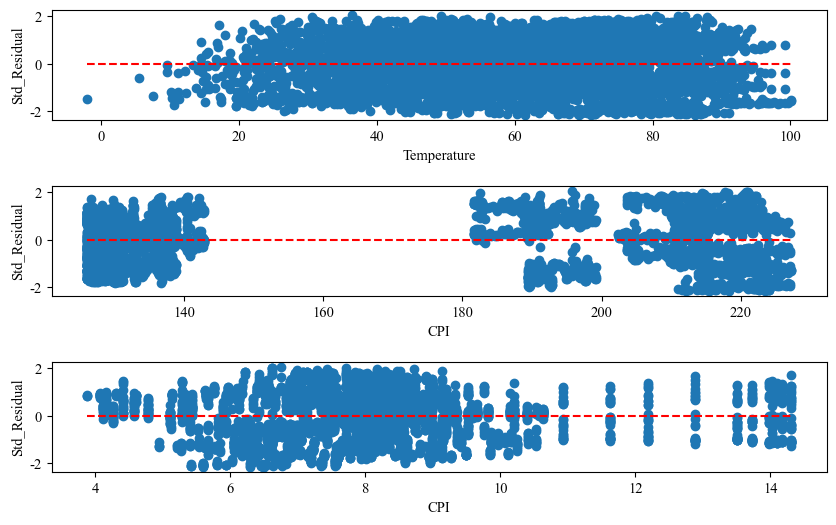

In [32]:
#设置第一张子图的位置
ax1 = plt.subplot2grid(shape=(3,1), loc=(0,0))
#绘制散点图
ax1.scatter(none_outliers.Temperature, (model_new.resid - model_new.resid.mean())/model_new.resid.std())
#添加水平参考线
ax1.hlines(y=0, xmin=none_outliers.Temperature.min(), xmax=none_outliers.Temperature.max(), colors='red', linestyles='--')
#添加x轴和y轴标签
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Std_Residual')

#设置第二张子图的位置
ax2 = plt.subplot2grid(shape=(3,1), loc=(1,0))
#绘制散点图
ax2.scatter(none_outliers.CPI, (model_new.resid - model_new.resid.mean())/model_new.resid.std())
#添加水平参考线
ax2.hlines(y=0, xmin=none_outliers.CPI.min(), xmax=none_outliers.CPI.max(), colors='red', linestyles='--')
#添加x轴和y轴标签
ax2.set_xlabel('CPI')
ax2.set_ylabel('Std_Residual')

#设置第三张子图的位置
ax3 = plt.subplot2grid(shape=(3,1), loc=(2,0))
#绘制散点图
ax3.scatter(none_outliers.Unemployment, (model_new.resid - model_new.resid.mean())/model_new.resid.std())
#添加水平参考线
ax3.hlines(y=0, xmin=none_outliers.Unemployment.min(), xmax=none_outliers.Unemployment.max(), colors='red', linestyles='--')
#添加x轴和y轴标签
ax3.set_xlabel('CPI')
ax3.set_ylabel('Std_Residual')

#调整子图之间的水平间距和高度间距
plt.subplots_adjust(hspace=0.6, wspace=0.3)
#显示图形
plt.show()

如上图所示，标准化残差并没有随自变量的变动而呈现喇叭形，所有的散点几乎均匀地分布在参考线y=0的附近。所以，可以说明模型的残差项满足方差齐性的前提假设。

#### 4.5.2 BP检验

从导入数据、拆分数据集到应用无异常值的数据集进行建模，都与前面的图形法一样。

In [33]:
BP_test = sm.stats.diagnostic.het_breuschpagan(model_new.resid, exog_het=model_new.model.exog)
print(BP_test)

(395.3307706927212, 2.8388084205976247e-84, 107.06224966913328, 1.0434183769112477e-87)


如上结果所示，元组中一共包含四个值：

- 第一个值1.468为LM统计量；
- 第二个值是统计量对应的概率p值，该值大于0.05，说明接受残差方差为常数的原假设；
- 第三个值为F统计量，用于检验残差平方项与自变量之间是否独立，如果独立则表明残差方差齐性；
- 第四个值则为F统计量的概率p值，同样大于0.05，则进一步表示残差项满足方差齐性的假设。
- 如果模型的残差不满足齐性的话，可以考虑两类方法来解决：

一类是模型变换法；
另一类是“加权最小二乘法”（可以使用statsmodels模块中的wls函数）。
  
对于模型变换法来说，主要考虑残差与自变量之间的关系：

如果残差与某个自变量x成正比，则需将原模型的两边同除以x1/2；
如果残差与某个自变量x的平方成正比，则需将原始模型的两边同除以x；
对于加权最小二乘法来说，关键是如何确定权重，根据多方资料的搜索和验证，一般选择如下三种权重来进行对比测试：

残差绝对值的倒数作为权重。
残差平方的倒数作为权重。
用残差的平方对数与自变量X重新拟合建模，并将得到的拟合值取指数，用指数的倒数作为权重。

从以上输出结果来看，符合方差齐性的假设。

## 5. 回归模型的预测

d:\software\python\python 3.8.10\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 23454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\software\python\python 3.8.10\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 38469 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\software\python\python 3.8.10\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\software\python\python 3.8.10\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 39044 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\software\python\python 3.8.10\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\software\python\python 3.8.10\lib\site-packages\matplotlib\backends\backend_agg.py

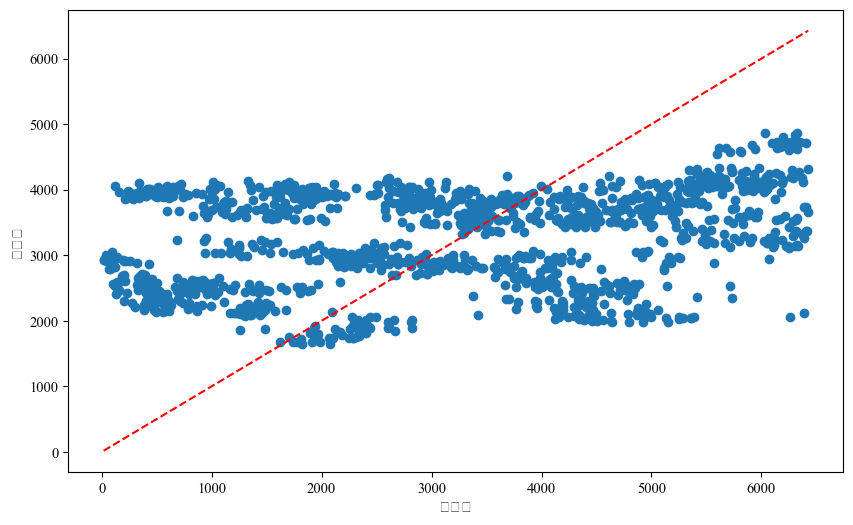

In [34]:
#modle_new对测试集的预测
pred_new = model_new.predict(exog=test.loc[:, ['Store', 'Temperature' , 'CPI' , 'Unemployment']])
#绘制预测值与实际值的散点图
plt.scatter(x=test.Weekly_Sales, y=pred_new)
#添加斜率为1、截距项为0的参考线
plt.plot([test.Weekly_Sales.min(), test.Weekly_Sales.max()], [test.Weekly_Sales.min(), test.Weekly_Sales.max()], color='red', linestyle='--')
#添加轴标签
plt.xlabel('实际值')
plt.ylabel('预测值')
#处理中文乱码
plt.rc('font',family='Microsoft YaHei')
#显示图形
plt.show()


绘制了有关模型在测试集上的预测值和实际值的散点图，该散点图可以用来衡量预测值与实际值之间的距离差异。如果两者非常接近，那么得到的散点图一定会在对角线附近微微波动。  
  
从上图的结果来看，大部分的散点并非落在对角线附近，再结合该预测模型对应的自变量对因变量的决定系数R方仅为0147，说明模型的预测效果不佳。
接下来我们将试着进行逻辑回归模型的构建来对销售额进行预测。